# Application: Reaction Rate Temperature Sensitivity

Stars are powered by nuclear fusion---combining light nuclei into heavier nuclei and releasing binding energy in the process.  Reaction rates have complex temperature dependences.  For example, the 3-$\alpha$ reaction rate (capturing ${}^4\mathrm{He} + {}^4\mathrm{He} + {}^4\mathrm{He} \rightarrow {}^{12}\mathrm{C}$ appears as:

$$q_{3\alpha} = 5.09\times 10^{11} \rho^2 Y^3 T_8^{-3} e^{-44.027/T8}~\mathrm{erg~g^{-1}~s^{-1}}$$

where $\rho$ is density, $Y$ is the mass fraction of He, and $T_8 = T / (10^8~\mathrm{K})$, with $T$ the temperature.

## Reaction vs. temperature

Let's visualize how this appears as a function of temperature.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def q3a(T):
    """this is the triple alpha reaction rate / rho^2 Y^3"""
    T8 = T/1e8
    return 5.09e11 * T8**-3 * np.exp(-44.027/T8)

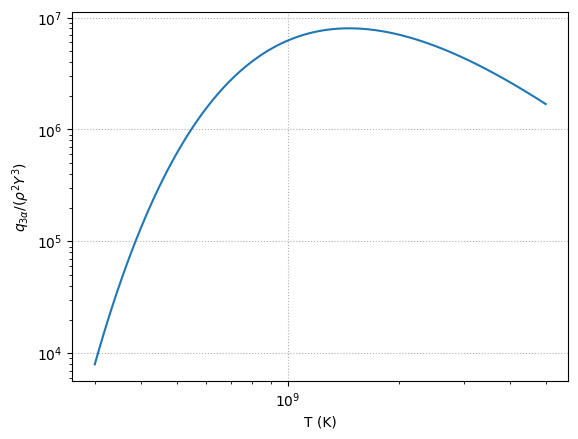

In [6]:
fig, ax = plt.subplots()
T = np.logspace(np.log10(3.e8), np.log10(5.e9), 100)

ax.loglog(T, q3a(T))
ax.set_xlabel("T (K)")
ax.set_ylabel(r"$q_{3\alpha}/(\rho^2 Y^3)$")
ax.grid(ls=":")

## Powerlaw approximation

Often, we want a simpler expression for the energy generation rate, as a powerlaw:

$$q_{3\alpha} = q_0 \rho^2 Y^3 \left (\frac{T}{T_0} \right )^\nu$$

around a temperature $T_0$.  

Here, $\nu$, is the temperature exponent of the rate, and tells us how sensitive the reactions
are to changes in temperature.  We see that:

$$\nu = \left . \frac{d\log q}{d\log T}\right |_{T_0} = \left ( \frac{T}{q} \frac{dq}{dT} \right )_{T_0}$$

From the plot, we can see that the slope changes a lot, so $\nu$ will vary quite a bit depending on our
choice of $T_0$.

We can compute this via numerical differencing.  Based on our understand of roundoff and truncation error,
we'll perturb the temperature by $10^{-8}$.

In [9]:
print("   T        nu")
for T0 in [1.e8, 2.5e8, 5.e8, 1.e9, 2.5e9, 5e9]:
    dT = 1.e-8 * T0
    nu = (T0/q3a(T0)) * (q3a(T0 + dT) - q3a(T0))/dT
    print(f"{T0:8.5g} : {nu:5.2f}")

   T        nu
   1e+08 : 41.03
 2.5e+08 : 14.61
   5e+08 :  5.81
   1e+09 :  1.40
 2.5e+09 : -1.24
   5e+09 : -2.12


We see that at a temperature of $10^8~\mathrm{K}$, the 3-$\alpha$ rate is $\sim T^{40}$!

## C++ implementation

Here's the same code in C++: 

```{literalinclude} 3alpha.cpp
```